In [400]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
from scipy.stats import skew
from sklearn.model_selection import learning_curve
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
import os
import warnings
warnings.filterwarnings('ignore')

For this assignment I have changed my life goals to being a successful real estate agent. Pursuant to my new life goals, it is imperative that I become the best real estate agent. And to do this, I need to be able to accurately predict housing prices, so I can sell the most houses. In order to predict housing prices, I need to know where housing prices are currently. To start I am going to read in some data and clean it so that I can work with it to create models. 


In [401]:
train_df= pd.read_csv("file:///Users/moirafacer/Desktop/train.csv")

In [402]:
len_train= len(train_df)

In [403]:
train_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [404]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [405]:
test_df= pd.read_csv("file:///Users/moirafacer/Desktop/test.csv")

In [406]:
test_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [407]:
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

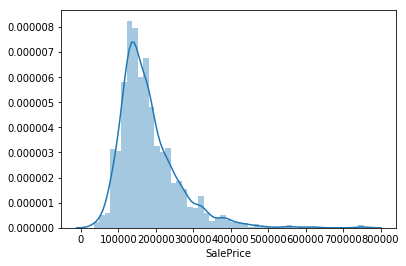

In [408]:
sns.distplot(train_df['SalePrice']);

Now that I have an idea of how sales prices look for houses currently, I can begin to build a model to predict them. If I train my model correctly, my results should look similar to current house prices. However, it is important to be aware of what determines housing price costs. To determine this, we can look at the correlation between the sale price and a number of different variables.


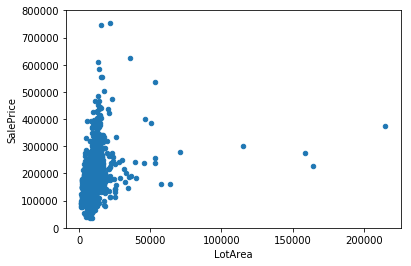

In [409]:
LotA= 'LotArea'
data= pd.concat([train_df['SalePrice'], train_df[LotA]], axis=1)
data.plot.scatter(x=LotA, y='SalePrice', ylim= (0,800000))

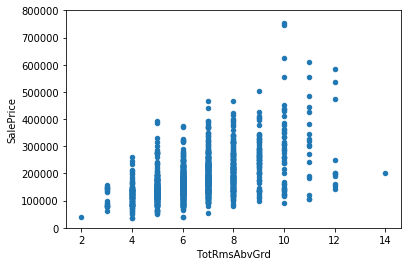

In [410]:
TotR= 'TotRmsAbvGrd'
data= pd.concat([train_df['SalePrice'], train_df[TotR]], axis=1)
data.plot.scatter(x=TotR, y='SalePrice', ylim= (0,800000))

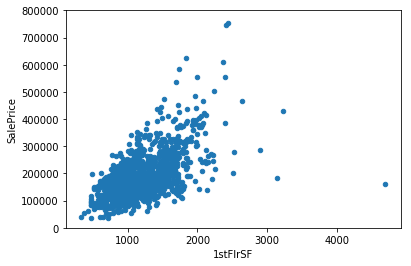

In [411]:
First= '1stFlrSF'
data= pd.concat([train_df['SalePrice'], train_df[First]], axis=1)
data.plot.scatter(x=First, y='SalePrice', ylim= (0,800000))

Using these scatter plots it is easy to see which features have the strongest correlation with housing prices, out of the three chose, lot area, total rooms above ground, and first floor square footage, first floor square footage had the strongest linear relationship with sale price. Logically this makes sense, people pay more for a bigger house. However, it may be important for us to be aware of the relationship of all of the variables and sales price. To do this we can create a nifty correlation heat map.


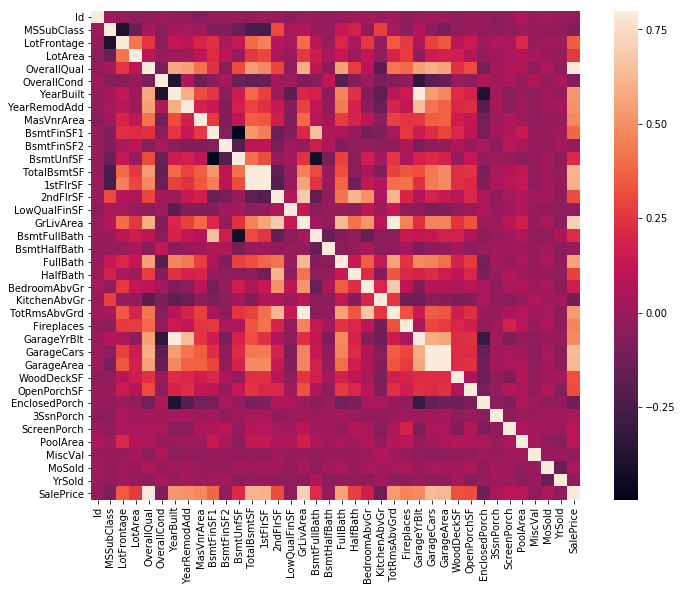

In [412]:
corrmap= train_df.corr()
f, ax= plt.subplots(figsize=(12, 9))
sns.heatmap(corrmap, vmax=.8, square=True)

The variables with the highest correlation to sales price are: Garage cars (how many cars fit in garage), Garage Area, Total Basement Square Footage and First Floor Square Footage. 
Now that we have a general idea of correaltion, I am going to begin building models. However in order to do this the data first needs to be cleaned and I need to deal with any missing data. The easiest way to do this is by grouping my training and test data together. 

In [413]:
data= train_df.append(test_df)

I previously tried a very simplistic way of cleaning the data, simply filling all missing data with the mean of the column. However that made my score abysmal, (like I literally originally scored in the 4,000s) so I am following others footsteps and doing a more complex cleaning process, assessing whether features should be dropped, and individually determing the best way to take care of missing data 

In [414]:
data.isnull().sum().sort_values(ascending=False) 

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
SalePrice        1459
FireplaceQu      1420
LotFrontage       486
GarageFinish      159
GarageCond        159
GarageQual        159
GarageYrBlt       159
GarageType        157
BsmtCond           82
BsmtExposure       82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MasVnrArea         23
MSZoning            4
BsmtFullBath        2
BsmtHalfBath        2
Utilities           2
Functional          2
Electrical          1
Exterior2nd         1
KitchenQual         1
Exterior1st         1
GarageCars          1
TotalBsmtSF         1
                 ... 
Neighborhood        0
YearBuilt           0
WoodDeckSF          0
TotRmsAbvGrd        0
Street              0
ScreenPorch         0
SaleCondition       0
RoofStyle           0
RoofMatl            0
PoolArea            0
PavedDrive          0
OverallQual         0
OverallCond         0
OpenPorchSF         0
MoSold    

In [415]:
round(data.isnull().sum().sort_values(ascending=False) / len(data),4)

PoolQC           0.9966
MiscFeature      0.9640
Alley            0.9322
Fence            0.8044
SalePrice        0.4998
FireplaceQu      0.4865
LotFrontage      0.1665
GarageFinish     0.0545
GarageCond       0.0545
GarageQual       0.0545
GarageYrBlt      0.0545
GarageType       0.0538
BsmtCond         0.0281
BsmtExposure     0.0281
BsmtQual         0.0277
BsmtFinType2     0.0274
BsmtFinType1     0.0271
MasVnrType       0.0082
MasVnrArea       0.0079
MSZoning         0.0014
BsmtFullBath     0.0007
BsmtHalfBath     0.0007
Utilities        0.0007
Functional       0.0007
Electrical       0.0003
Exterior2nd      0.0003
KitchenQual      0.0003
Exterior1st      0.0003
GarageCars       0.0003
TotalBsmtSF      0.0003
                  ...  
Neighborhood     0.0000
YearBuilt        0.0000
WoodDeckSF       0.0000
TotRmsAbvGrd     0.0000
Street           0.0000
ScreenPorch      0.0000
SaleCondition    0.0000
RoofStyle        0.0000
RoofMatl         0.0000
PoolArea         0.0000
PavedDrive      

In [416]:
data_na = data.isnull().sum() / len(data)
data_na = data_na.drop(data_na[data_na == 0].index)
data_na.sort_values(ascending=False)

PoolQC          0.996574
MiscFeature     0.964029
Alley           0.932169
Fence           0.804385
SalePrice       0.499829
FireplaceQu     0.486468
LotFrontage     0.166495
GarageQual      0.054471
GarageCond      0.054471
GarageFinish    0.054471
GarageYrBlt     0.054471
GarageType      0.053786
BsmtExposure    0.028092
BsmtCond        0.028092
BsmtQual        0.027749
BsmtFinType2    0.027407
BsmtFinType1    0.027064
MasVnrType      0.008222
MasVnrArea      0.007879
MSZoning        0.001370
BsmtFullBath    0.000685
BsmtHalfBath    0.000685
Utilities       0.000685
Functional      0.000685
Electrical      0.000343
BsmtUnfSF       0.000343
Exterior1st     0.000343
Exterior2nd     0.000343
TotalBsmtSF     0.000343
GarageCars      0.000343
BsmtFinSF2      0.000343
BsmtFinSF1      0.000343
KitchenQual     0.000343
SaleType        0.000343
GarageArea      0.000343
dtype: float64

Another "expert realtor" suggested that for all columns that are missing more than 20% to simply fill the answer it with none rather than the mean, because so much of the data is missing that filling it in with the mean will likely skew my results. So I will fill the 5 features (not including salesprice) that are missing more than 20% of their data with None. 

In [417]:
data.PoolQC = data.PoolQC.fillna("None")

data.MiscFeature = data.MiscFeature.fillna("None")

data.Alley = data.Alley.fillna("None")

data.Fence = data.Fence.fillna("None")

data.FireplaceQu = data.FireplaceQu.fillna("None")

We talked briefly in class about how there could be correlations between things that could help us make sense of the data, so I decided to try and use some of these to deal with missing data. I decided to use Lot Frontage, and Neighborhood. My brilliant work as a realtor, and my many hours of googling have taught me that homes in a neighborhood usually have similar Lot Frontage. 

In [418]:
data.LotFrontage.describe()

count    2433.000000
mean       69.305795
std        23.344905
min        21.000000
25%        59.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [419]:
data.groupby('Neighborhood')['LotFrontage'].mean().sort_values(ascending=False)

Neighborhood
NoRidge    91.629630
ClearCr    88.150000
NridgHt    84.184049
NWAmes     81.517647
Timber     81.157895
NAmes      75.210667
Mitchel    75.144444
Sawyer     74.551020
Gilbert    74.207207
Veenker    72.000000
CollgCr    71.336364
SawyerW    70.669811
Crawfor    69.951807
Edwards    66.910112
Somerst    64.549383
IDOTRR     62.241379
StoneBr    62.173913
OldTown    61.777293
SWISU      59.068182
BrkSide    55.789474
Blmngtn    46.900000
NPkVill    28.142857
Blueste    27.300000
MeadowV    25.606061
BrDale     21.500000
Name: LotFrontage, dtype: float64

Since I've connected the two I can use the mean of the respective neighborhoods to fill in a more realistic mean for Lot Frontage

In [420]:
data.LotFrontage = data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.mean()))

Dealing with other data that needs to be cleaned: garages and their related features are very important for the housing prices as shown in my correlation graph above, however the data for them is weird. If a house does not have a garage I am going to fill that missing data in with None, so it is clear that the house doesn't have a garage versus not knowing. Then I'll do the same with the other garage type features. 

In [421]:
data.GarageFinish = data.GarageFinish.fillna('None')

In [422]:
cols = ['GarageFinish', 'GarageQual', 'GarageType', 'GarageCond']
for col in cols:
    data[col] = data[col].fillna('None')

In [423]:
cols = ['GarageYrBlt', 'GarageCars', 'GarageArea']
for col in cols:
    data[col] = data[col].fillna(0)

Similarly with the basement based on the information provided, we know that missing data means no basement. So we will do the same thing as before.

In [424]:
cols = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']
for col in cols:
    data[col] = data[col].fillna(0)

In [425]:
cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
for col in cols:
    data[col] = data[col].fillna('None') 

In [426]:
data_na = data.isnull().sum() / len(data)
data_na = data_na.drop(data_na[data_na == 0].index)
data_na.sort_values(ascending=False)

SalePrice      0.499829
MasVnrType     0.008222
MasVnrArea     0.007879
MSZoning       0.001370
Utilities      0.000685
Functional     0.000685
SaleType       0.000343
KitchenQual    0.000343
Exterior2nd    0.000343
Exterior1st    0.000343
Electrical     0.000343
dtype: float64

In [427]:
data['MasVnrType'] = data['MasVnrType'].fillna('None')
data['MasVnrArea'] = data['MasVnrArea'].fillna(0)

In [428]:
data.MSZoning.isnull().sum()

4

In [429]:
data.MSZoning.value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [430]:
data.MSZoning = data.MSZoning.fillna(data.MSZoning.mode()[0])

It was suggested to me to use the mode rather than the mean to fill in certain columns based on the characteristics of the particular feature, it was also suggested that if there are very few missing points of data to consider dropping them which I will probably do.

In [431]:
data.Utilities.isnull().sum()

2

In [432]:
data.Utilities.value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [433]:
print(data[data.Utilities == 'NoSeWa'])
print(train_df.shape)

     1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType BsmtCond  \
944      1344         0          0  None             3     1Fam       TA   

    BsmtExposure  BsmtFinSF1  BsmtFinSF2  ...   SaleType ScreenPorch  Street  \
944           No       111.0       354.0  ...        COD         233    Pave   

     TotRmsAbvGrd TotalBsmtSF  Utilities WoodDeckSF YearBuilt YearRemodAdd  \
944             7       819.0     NoSeWa          0      1958         1958   

    YrSold  
944   2009  

[1 rows x 81 columns]
(1460, 81)


In [434]:
data = data.drop('Utilities', axis=1)

In [435]:
data.Functional.isnull().sum()

2

In [436]:
data.Functional.value_counts()

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [437]:
data.Functional = data.Functional.fillna(data.Functional.mode()[0])

In [438]:
data.SaleType.isnull().sum()

1

In [439]:
data.SaleType.value_counts()

WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [440]:
data.SaleType = data.SaleType.fillna(data.SaleType.mode()[0])

In [441]:
data.KitchenQual.isnull().sum()

1

In [442]:
data.KitchenQual.value_counts()

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

In [443]:
data.KitchenQual = data.KitchenQual.fillna(data.KitchenQual.mode()[0])

In [444]:
data.Electrical.isnull().sum()

1

In [445]:
data.Electrical.value_counts()

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [446]:
data.Electrical = data.Electrical.fillna(data.Electrical.mode()[0])

In [447]:
print(data.Exterior1st.isnull().sum())
print(data.Exterior2nd.isnull().sum())

1
1


In [448]:
print(data.Exterior1st.value_counts())
print(data.Exterior2nd.value_counts())

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
Stone         2
AsphShn       2
CBlock        2
ImStucc       1
Name: Exterior1st, dtype: int64
VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
Stucco       47
BrkFace      47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64


In [449]:
data.Exterior1st = data.Exterior1st.fillna(data.Exterior1st.mode()[0])
data.Exterior2nd = data.Exterior2nd.fillna(data.Exterior2nd.mode()[0])

In [450]:
data_na = data.isnull().sum() / len(data)
data_na = data_na.drop(data_na[data_na == 0].index)
data_na.sort_values(ascending=False)

SalePrice    0.499829
dtype: float64

Voila! Only SalePrice is left with missing data, which is because of the test data so I am going to leave that alone.  

In [451]:
data.dtypes

1stFlrSF           int64
2ndFlrSF           int64
3SsnPorch          int64
Alley             object
BedroomAbvGr       int64
BldgType          object
BsmtCond          object
BsmtExposure      object
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtFinType1      object
BsmtFinType2      object
BsmtFullBath     float64
BsmtHalfBath     float64
BsmtQual          object
BsmtUnfSF        float64
CentralAir        object
Condition1        object
Condition2        object
Electrical        object
EnclosedPorch      int64
ExterCond         object
ExterQual         object
Exterior1st       object
Exterior2nd       object
Fence             object
FireplaceQu       object
Fireplaces         int64
Foundation        object
FullBath           int64
                  ...   
LotFrontage      float64
LotShape          object
LowQualFinSF       int64
MSSubClass         int64
MSZoning          object
MasVnrArea       float64
MasVnrType        object
MiscFeature       object
MiscVal            int64


In [452]:
data.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'Id', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'Po

This was also suggested to me by a more successful realtor, connecting features for more accurate analysis. So I'm going to create square footage data

In [453]:
data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF'] + data['GarageArea']

In [454]:
data= pd.get_dummies(data)

In [455]:
data.shape

(2919, 303)

## Finally Time to Test, first up basic Linear Regression

I chose linear regression because it is the first model we used in class, and the easiest way to obtain a rmse. 

In [456]:
train = data[:len_train]
test = data[len_train:]

In [457]:
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge

In [458]:
n_folds = 6 
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold 
scorer = make_scorer(mean_squared_error, greater_is_better = False)
def rmse_CV_train(model):
    kf = KFold(n_folds, shuffle= True, random_state= 42).get_n_splits(train_df.values)
    rmse = np.sqrt(-cross_val_score(model, x_train, y_train, scoring="neg_mean_squared_error", cv= kf))
    return (rmse)
def rmse_CV_test(model):
    kf= KFold(n_folds, shuffle = True, random_state= 42).get_n_splits(train_df.values)
    rmse = np.sqrt(-cross_val_score(model, x_test, y_test, scoring = "neg_mean_squared_error", cv=kf))
    return (rmse)

In [459]:
X_train = train.drop(['SalePrice'], axis=1)
y_train = train['SalePrice']
X_test = test.drop(['SalePrice'], axis=1)
y_test= test['SalePrice']

In [460]:
X_train = np.log1p(train.drop(['SalePrice'], axis=1))
y_train= np.log1p(train['SalePrice'])
X_test = np.log1p(test.drop(['SalePrice'], axis=1))
y_test= np.log1p(test['SalePrice'])

In [461]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
acc_lin = round(linreg.score(X_train, y_train) * 100, 2)
acc_lin


94.66

In [462]:
submission= pd.DataFrame()
submission['Id']=test_df.Id
feats= test_df.select_dtypes(include=[np.number]).drop(['Id'], axis=1).interpolate()
predictions= linreg.predict(X_test)
final_predictions= np.exp(predictions)
submission['SalePrice']=final_predictions

In [463]:
sub= pd.DataFrame({"Id":test_df.Id, "SalePrice":final_predictions})
sub.to_csv("Prediction4", index= False)

In [464]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=make_scorer(mean_squared_error))
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/Users/moirafacer/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

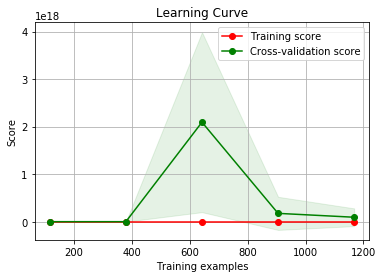

In [465]:
plot_learning_curve(linreg, "Learning Curve", X_train, y_train, cv=5)

This is model is fine if you want a rough idea of how housing prices should look. However, there is a signifact high variance problem happening, I would not recommend using it as your sole prediction of house prices, as it will likely lead you astray.

## Elastic NetCV

Similar story to before, I chose this model because I understand what it does because we went over it in class. I chose elastic net over a lasso 1 or lasso 2 because of the fact that it is an average of the two I felt it would give me more accurate results. This model performed the best out of all of my models. 

In [466]:
from sklearn.linear_model import ElasticNetCV

In [467]:
clf= ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], alphas= [.1, 1, 10])
clf.fit(X_train, y_train)
train_predictions= clf.predict(X_train)
test_predictions= clf.predict(X_test)
print("Train MSE: {}".format(mean_squared_error(y_train, train_predictions)))

Train MSE: 0.03429555380595363


In [468]:
submission= pd.DataFrame()
submission['Id']=test_df.Id
feats= test_df.select_dtypes(include=[np.number]).drop(['Id'], axis=1).interpolate()
predictions= clf.predict(X_test)
final_predictions= np.exp(predictions)
submission['SalePrice']=final_predictions

In [469]:
sub2= pd.DataFrame({"Id":test_df.Id, "SalePrice":final_predictions})
sub2.to_csv("Prediction3", index= False)

In [470]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=make_scorer(mean_squared_error))
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


<module 'matplotlib.pyplot' from '/Users/moirafacer/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

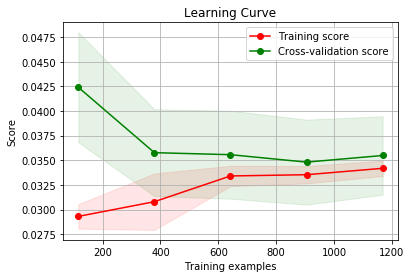

In [471]:
plot_learning_curve(clf,"Learning Curve", X_train, y_train, cv=5)

This model did much better, as evidenced by the learning curve. There is no high variance problem, however there could be a high bias issue, or it could just be that I am coming closer to the real mse.

## K Nearest Neighbors

The final model I chose was K nearest neighbors, I again chose this model because we went over it in class and therefore I was familiar with it. I feel like this may be the most nievely accurate test, as in, had I not known about linear regression I would likely assume this to give me the most accurate results because houses tend to be priced similary in neighbor hoods (literally K nearest NEIGHBORS). However I do not think it has given me the most accurate results out of all of my models. 

In [472]:
from sklearn.model_selection import cross_val_score

neighbors = range(1,20)
cv_scores = []

for k in neighbors:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train)
    cv_scores.append(scores.mean())

MSE = [1 - x for x in cv_scores]

optimal_k = neighbors[MSE.index(min(MSE))]

print(optimal_k)

5


## Simple Elastic Net

I tried a much simpler elastic net model with out CV, I know things "perform" better with cross validation, but I wanted to try and see how much of a difference that it made. I chose these hyper parameters simply by running the model a number of times until it converged (I conveniently recieved a warning error each time it did not converge, and would adjust my alpha accordingly)

In [473]:
from sklearn.linear_model import ElasticNet

alpha= 10000
enet= ElasticNet(alpha= alpha)
y_pred_enet= enet.fit(X_train, y_train).predict(X_test)
print (y_pred_enet)

[12.02405739 12.02405739 12.02405739 ... 12.02405739 12.02405739
 12.02405739]


In [477]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=make_scorer(mean_squared_error))
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


<module 'matplotlib.pyplot' from '/Users/moirafacer/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

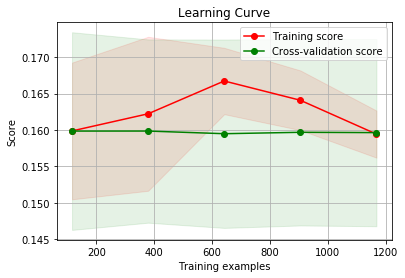

In [478]:
plot_learning_curve(enet,"Learning Curve", X_train, y_train, cv=5)

There is clear evidence of over fitting with this model, and as evidenced by the learning curve for the Elastic NetCV, adding CV onto my models is the way to go if I want more accurate predictions.

In conclusion, I am fairly confident in my models, however, I am still new to the whole being a realtor thing so I am not as confident in my house price predictions as other realtors are. But that will change with practice, and as I learn more models.